In [1]:
import pandas as pd

Preprocessing of dataset #7 <br> 
```pip install pycountry``` is needed to change 2-code to full name of country

In [2]:
import pandas as pd
import os
# pydir = os.path.dirname(__file__)
# datadir = pydir + '\\data\\'
pydir = os.path.abspath('')
datadir = os.path.join(pydir, 'data')
datalist = os.listdir(datadir)
filepath = []
# if filepath.endswith('xlsx'):
# df = pd.read_excel(filepath)
# elif filepath.endswith('csv'):
# df = pd.read_csv(filepath)
#else #tsv files
# df = pd.read_csv(filepath,sep='\t')

for file in datalist:
    print(file)
    filepath.append(pydir + '\\data\\' + file)

print(filepath)

for i in range(len(filepath)):
    if i<=4:
        print(filepath[i]+': NISZO+DAVIDE')
        #write your code here
        # needed actions: sort data (per ship type) -> save
    elif i == 5:
        print(filepath[i]+': PIOTER')
        # write your code here
    elif i == 6:
        print(filepath[i]+': ZACHOS')
        # write your code here
    elif i == 7:
        print(filepath[i]+': VASILIS')
        # Import pycountry--> pip install pycountry (used to change 2-code to full name of country)
        import pycountry 

        # Read CSV file
        df_cargo = pd.read_csv(filepath[i])

        # Keep only the relevant columns (country, time-period, cargo)
        df_cargo = df_cargo.iloc[:,[6, 7, 8]]

        # Rename those columns
        df_cargo.columns = ["Country", "Time-period", "Cargo [tons]"]

        # Remove data that is specific to particular cities within each country (contain "_")
        # Remove data that is dated later than 2022.  
        df_cargo = df_cargo[~(df_cargo["Country"].str.contains("_") | df_cargo["Time-period"].str.contains("2023"))] 

        # Replace 2-letter code with full name of the country
        # __!!!___FOR THIS STEP pycountry IS NEEDED__!!!__ --> pip install pycountry
        country_mapping = {}
        for code in df_cargo["Country"].unique():
            try:
                country = pycountry.countries.get(alpha_2 = code)
                if country:
                    country_name = country.name
                    country_mapping[code] = country_name
                else:
                    if code == "EL":
                        country_mapping[code] = "Greece"   # Dataset has EL insted of GR
                    elif code == "UK":
                        country_mapping[code] = "United Kingdom" # Dataset has UK insted of GB     
            except LookupError:
                country_mapping[code] = "Not Found"
        df_cargo["Country"] = df_cargo["Country"].map(country_mapping)

        # Reform the table into multiple columns
        df_cargo = df_cargo.groupby(["Time-period", "Country"])["Cargo [tons]"].sum().unstack()

        # Print the processed table
        print(df_cargo.head())

    elif i == 8:
        print(filepath[i]+': PIOTER')
        # write your code here
    elif i == 9:
        print(filepath[i]+': PIOTER')
        # write your code here

2018-v270-11102023-EU MRV Publication of information.xlsx
2019-v217-11102023-EU MRV Publication of information.xlsx
2020-v194-11102023-EU MRV Publication of information.xlsx
2021-v176-13102023-EU MRV Publication of information.xlsx
2022-v92-17102023-EU MRV Publication of information.xlsx
avia_paoc__custom_7888404_linear.csv
EDGARv8.0_FT2022_GHG_booklet_2023.xlsx
mar_go_qm__custom_93281_linear.csv
mar_pa_aa.tsv
rail_pa_quartal_linear.csv
['c:\\Users\\sid_b\\OneDrive\\Υπολογιστής\\MARINE TECHNOLOGY\\Q5\\Python TIL6022\\Project Group 34\\TIL6022-group34\\ProjectFiles\\data\\2018-v270-11102023-EU MRV Publication of information.xlsx', 'c:\\Users\\sid_b\\OneDrive\\Υπολογιστής\\MARINE TECHNOLOGY\\Q5\\Python TIL6022\\Project Group 34\\TIL6022-group34\\ProjectFiles\\data\\2019-v217-11102023-EU MRV Publication of information.xlsx', 'c:\\Users\\sid_b\\OneDrive\\Υπολογιστής\\MARINE TECHNOLOGY\\Q5\\Python TIL6022\\Project Group 34\\TIL6022-group34\\ProjectFiles\\data\\2020-v194-11102023-EU MRV Publ

Preprocessing before creating my branch (OLD ONE)

In [ ]:
# # Import pycountry--> pip install pycountry (used to change 2-code to full name of country)
# import pycountry 

# # Read CSV file
# file_path = 'mar_go_qm__custom_93281_linear.csv'
# df = pd.read_csv(file_path)

# # Keep only the relevant columns (country, time-period, cargo)
# df = df.iloc[:,[6, 7, 8]]

# # Rename those columns
# df.columns = ["Country", "Time-period", "Cargo [tons]"]

# # Remove data that is specific to particular cities within each country (contain "_")
# # Remove data that is dated later than 2022.  
# df = df[~(df["Country"].str.contains("_") | df["Time-period"].str.contains("2023"))] 

# # Replace 2-letter code with full name of the country
# # __!!!___FOR THIS STEP pycountry IS NEEDED__!!!__ --> pip install pycountry
# country_mapping = {}
# for code in df["Country"].unique():
#     try:
#         country = pycountry.countries.get(alpha_2 = code)
#         if country:
#             country_name = country.name
#             country_mapping[code] = country_name
#         else:
#             if code == "EL":
#                 country_mapping[code] = "Greece"   # Dataset has EL insted of GR
#             elif code == "UK":
#                 country_mapping[code] = "United Kingdom" # Dataset has UK insted of GB     
#     except LookupError:
#         country_mapping[code] = "Not Found"
# df["Country"] = df["Country"].map(country_mapping)

# # Reform the table into multiple columns
# df = df.groupby(["Time-period", "Country"])["Cargo [tons]"].sum().unstack()

# df


Import

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


Visualization - top 5 most affected countries <br><br>
comments:<br>
1. We can select the time interval for the plot to make the dip more clear-->see comment in text
2. I think that the "top 5 most affected countries" is not the right choice because we end up with countries like Malta and Latvia. Instead maybe top 5 trading countries?? (see next one)

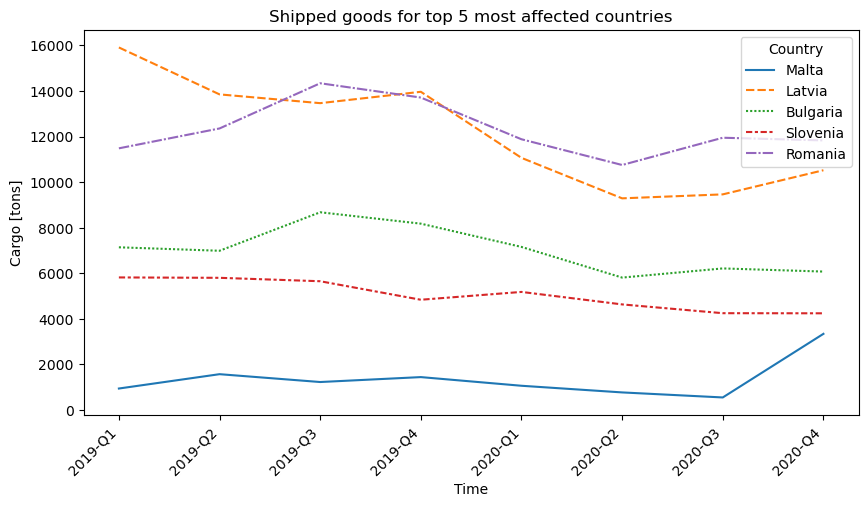

In [4]:
# Find the maximum for each country in 2019
max_2019 = df_cargo.loc["2019-Q1":"2019-Q4"].max()

# Find the maximum for each country for 2020
min_2020 = df_cargo.loc["2020-Q1":"2020-Q4"].min()

# Find the percentage change for each coutry
change = (max_2019 - min_2020) / max_2019 * 100

# Short the countries by percentage change (desceding)
most_affected_countries = change.sort_values(ascending=False)

# Filter the data that are going to be ploted
# If we prefer to plot for the interval 2017-Q1 to 2022-Q4
#filtered_data = df_cargo[most_affected_countries.head(5).index]

# If we prefer to plot only for the interval 2019-Q1 to 2020-Q4
filtered_data = df_cargo[most_affected_countries.head(5).index].loc["2019-Q1":"2020-Q4"]

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=filtered_data)
plt.xlabel("Time")
plt.ylabel("Cargo [tons]")
plt.title("Shipped goods for top 5 most affected countries")
plt.xticks(rotation=45, ha="right")
plt.show()

Visualization - affect on the top trading countries

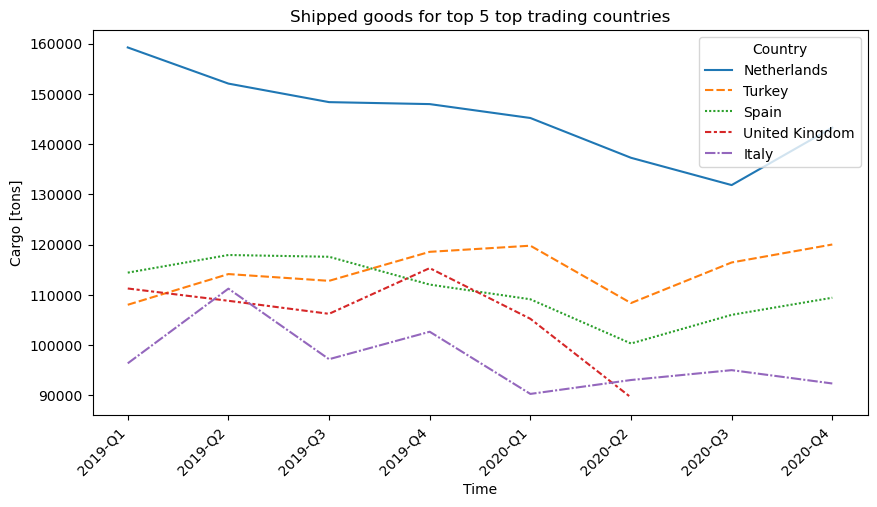

In [5]:
# Find the maximum for each country in 2019
max_2019 = df_cargo.loc["2019-Q1":"2019-Q4"].max()

# Short the countries by amount of transported goods
leading_countries = max_2019.sort_values(ascending=False)

# Filter the data that are going to be ploted
# If we prefer to plot for the interval 2017-Q1 to 2022-Q4
#filtered_data = df[leading_countries.head(5).index]

# If we prefer to plot only for the interval 2019-Q1 to 2020-Q4
filtered_data = df_cargo[leading_countries.head(5).index].loc["2019-Q1":"2020-Q4"]

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=filtered_data)
plt.xlabel("Time")
plt.ylabel("Cargo [tons]")
plt.title("Shipped goods for top 5 top trading countries")
plt.xticks(rotation=45, ha="right")
plt.show()

Read .shp file to create the map

In [6]:
# Local system
# europe = gpd.read_file(r'C:\Users\sid_b\OneDrive\Υπολογιστής\MARINE TECHNOLOGY\Q5\Python TIL6022\Project Group 34\TIL6022-group34\ProjectFiles\european_map.shp\NUTS_RG_20M_2021_3035.shp')

# Read from remote repo
file_path = os.path.abspath('') + '\\european_map.shp\\NUTS_RG_20M_2021_3035.shp'
europe = gpd.read_file(file_path)

In the first few lines, I am doing a similar thing to the preprocessing. However, I am skipping the lines that transform the 2-digit country codes into the full country names because the GeoDataFrame already includes a column with the 2-digit country codes and I can match them easily. I assume there might be a more efficient way to achieve this, and I will figure it out. 

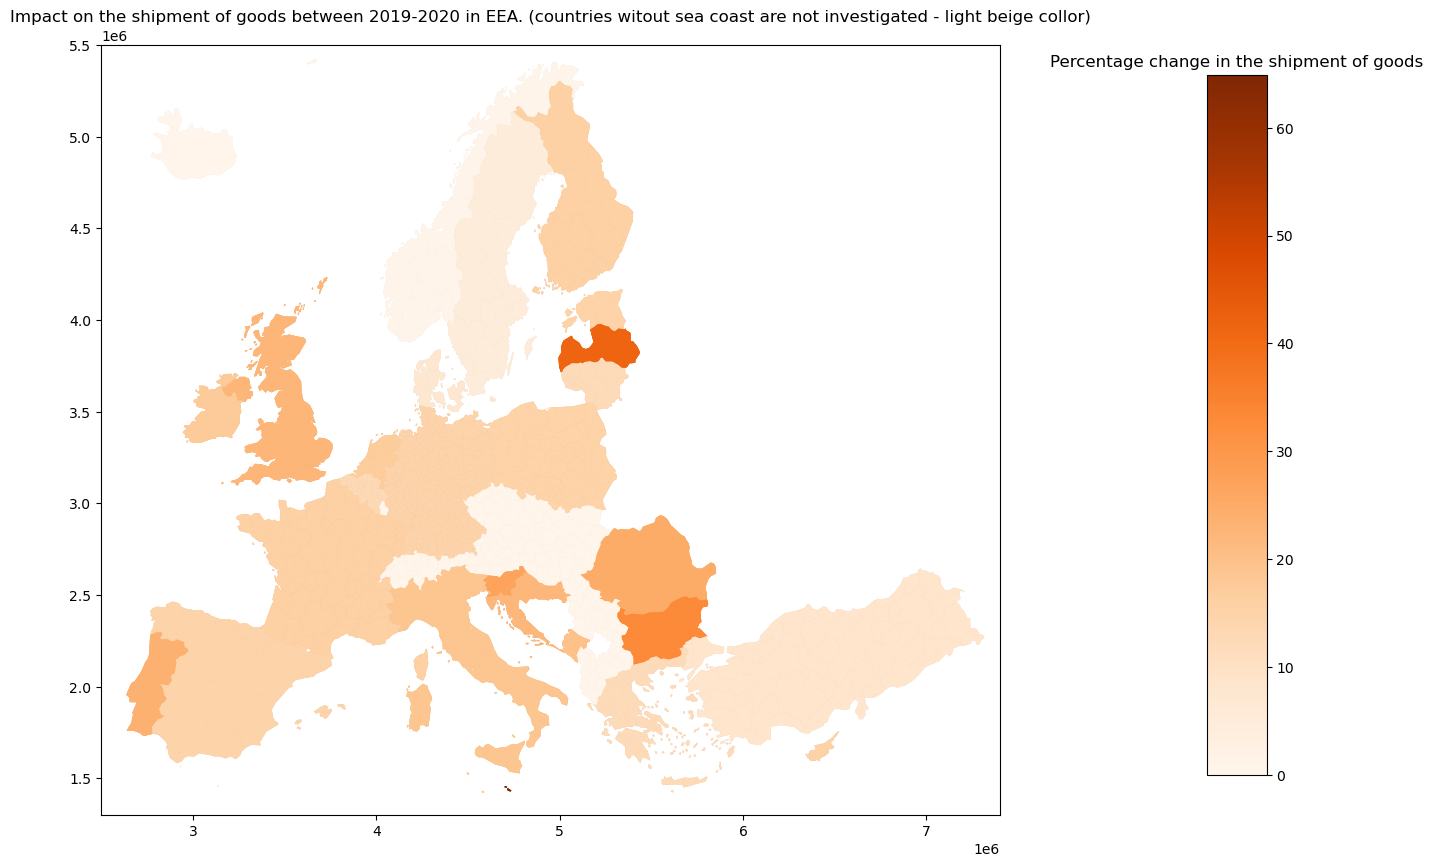

In [7]:
# Read CSV file
file_path = 'mar_go_qm__custom_93281_linear.csv'
df_cargo = pd.read_csv(filepath[7]) 

# Keep only the relevant columns (country, time-period, cargo)
df_cargo = df_cargo.iloc[:,[6, 7, 8]]

# Rename those columns
df_cargo.columns = ["Country", "Time-period", "Cargo [tons]"]

# Remove data that is specific to particular cities within each country (contain "_")
# Remove data that is dated later than 2022.  
df_cargo = df_cargo[~(df_cargo["Country"].str.contains("_") | df_cargo["Time-period"].str.contains("2023"))] 

# Reform the table into multiple columns
# df = df.pivot(index="Time-period", columns="Country", values="Cargo [tons]").reset_index()
df_cargo = df_cargo.groupby(["Time-period", "Country"])["Cargo [tons]"].sum().unstack()

# Find the maximum for each country in 2019
max_2019 = df_cargo.loc["2019-Q1":"2019-Q4"].max()

# Find the maximum for each country for 2020
min_2020 = df_cargo.loc["2020-Q1":"2020-Q4"].min()

# Find the percentage change for each coutry
change = (max_2019 - min_2020) / max_2019 * 100

# Make a dictionary with countries as keys and their % change as values
countries_with_effect = change.to_dict()

# All european countries in GeoDataFrame as keys in a dictionary with 0 values
countries_final = {key: 0 for key in europe['CNTR_CODE'].unique()}

# Merge the two dictionaries, giving priority to the first one
merged_dict_of_countries = {**countries_final, **countries_with_effect}

# Create a new column named "PercentageChange" in the europe20 GeoDataFrame
europe["PercentageChange"] = europe["CNTR_CODE"].map(merged_dict_of_countries)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.set_xlim(0.25e7, 0.74e7)
ax.set_ylim(0.13e7, 0.55e7)
ax.set_title("Impact on the shipment of goods between 2019-2020 in EEA. (countries witout sea coast are not investigated - light beige collor)")
europe.plot(column="PercentageChange", cmap='Oranges', linewidth=0.01, ax=ax, edgecolor='0.8', legend=True, cax=ax.get_figure().add_axes([0.95, 0.15, 0.04, 0.7]))
ax.get_figure().get_axes()[1].set_title("Percentage change in the shipment of goods")
plt.show()

